In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

csv_data = pd.read_csv('../data/bank.csv', sep=';')
csv_data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [3]:
print(csv_data.values)
print(csv_data.columns)
print(csv_data.index)

[[30 'unemployed' 'married' ... 0 'unknown' 'no']
 [33 'services' 'married' ... 4 'failure' 'no']
 [35 'management' 'single' ... 1 'failure' 'no']
 ...
 [57 'technician' 'married' ... 0 'unknown' 'no']
 [28 'blue-collar' 'married' ... 3 'other' 'no']
 [44 'entrepreneur' 'single' ... 7 'other' 'no']]
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
RangeIndex(start=0, stop=4521, step=1)


In [9]:
# print index 11 to 15
print(csv_data.iloc[:,11:15])

      duration  campaign  pdays  previous
0           79         1     -1         0
1          220         1    339         4
2          185         1    330         1
3          199         4     -1         0
4          226         1     -1         0
...        ...       ...    ...       ...
4516       329         5     -1         0
4517       153         1     -1         0
4518       151        11     -1         0
4519       129         4    211         3
4520       345         2    249         7

[4521 rows x 4 columns]


In [10]:
csv_data.y

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object

In [6]:
X = csv_data.iloc[:,11:15]
y = csv_data.y

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree 

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(3164, 4)
(1357, 4)


In [7]:
X_train

array([[-0.26926013, -0.57682947,  2.07005544,  0.27012381],
       [-0.66567638, -0.57682947, -0.4072183 , -0.32041282],
       [-0.67337379, -0.57682947, -0.4072183 , -0.32041282],
       ...,
       [ 0.47738796,  0.06636847,  1.41078098,  0.27012381],
       [ 1.00081137, -0.57682947, -0.4072183 , -0.32041282],
       [-0.14995038, -0.2552305 , -0.4072183 , -0.32041282]])

In [11]:
dt1 = tree.DecisionTreeClassifier()
dt1 = dt1.fit(X_train, y_train)
pred = dt1.predict(X_test)
print(np.mean(pred == y_test))

0.8445099484156227


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

confusion_matrix(y_test, pred)

array([[1097,   93],
       [ 118,   49]])

In [17]:
accuracy_score(y_test, pred)

0.8445099484156227

In [19]:
tree_text = tree.export_text(dt1)
print(tree_text)

|--- feature_0 <= 1.41
|   |--- feature_0 <= -0.20
|   |   |--- feature_2 <= -0.40
|   |   |   |--- feature_0 <= -0.72
|   |   |   |   |--- class: no
|   |   |   |--- feature_0 >  -0.72
|   |   |   |   |--- feature_1 <= -0.42
|   |   |   |   |   |--- feature_0 <= -0.23
|   |   |   |   |   |   |--- feature_0 <= -0.54
|   |   |   |   |   |   |   |--- feature_0 <= -0.61
|   |   |   |   |   |   |   |   |--- feature_0 <= -0.61
|   |   |   |   |   |   |   |   |   |--- feature_0 <= -0.66
|   |   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |   |   |--- feature_0 >  -0.66
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= -0.66
|   |   |   |   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  -0.66
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |--- feature_0 >  -0.61
|   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |  

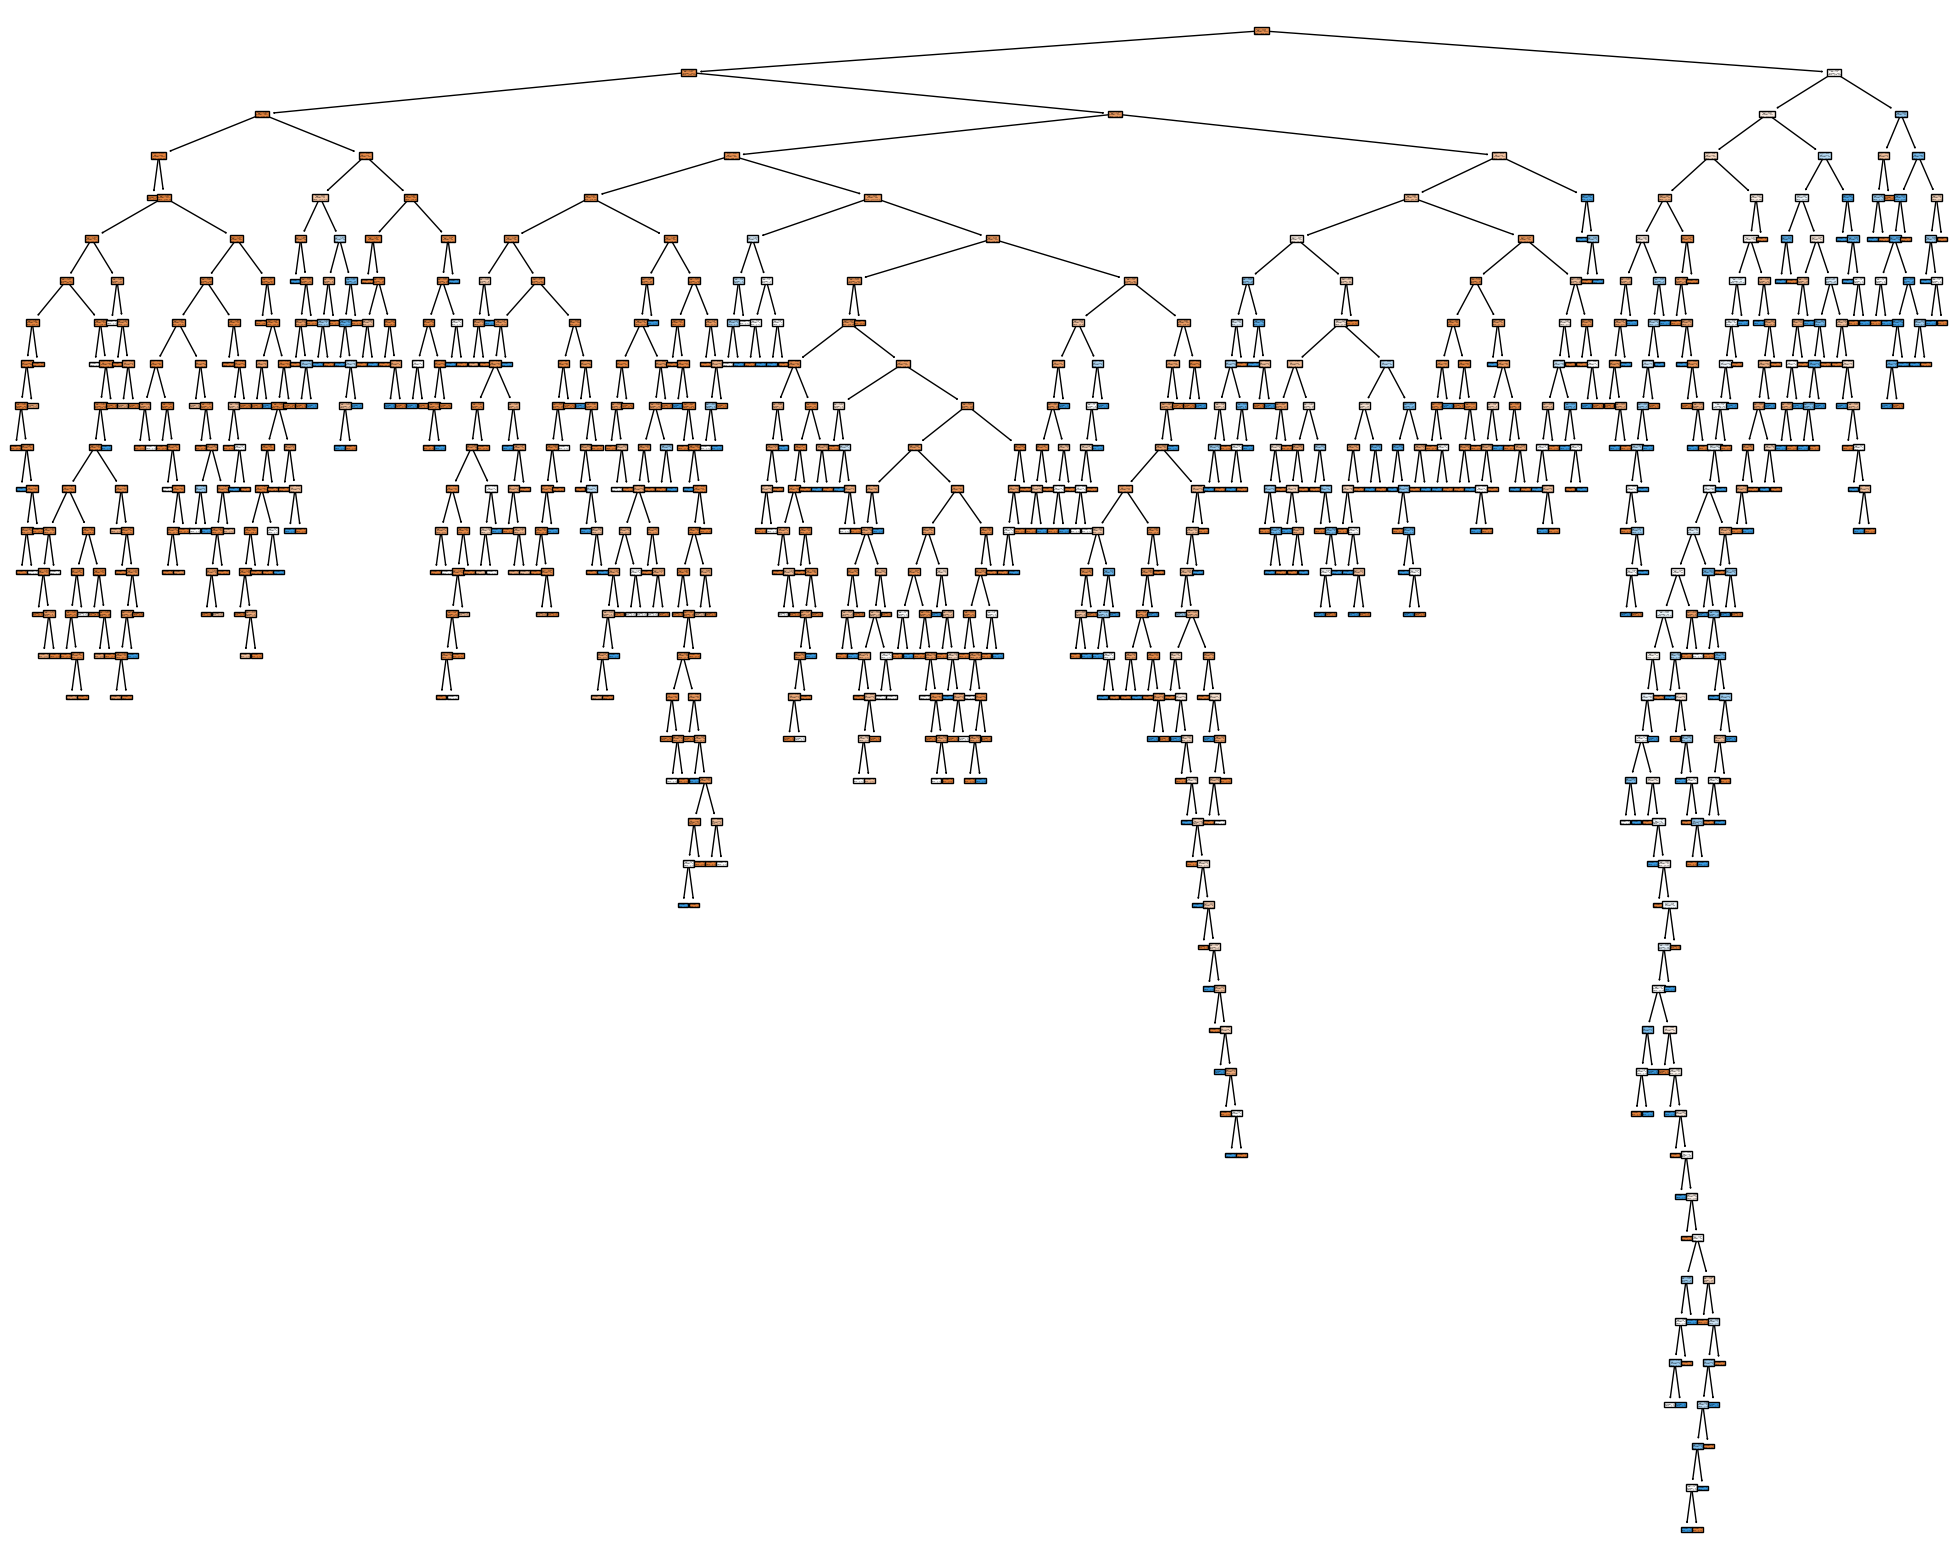

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt1, filled=True)

fig.savefig("decistion_tree.png")

In [25]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=1234)
rf.fit(X_train, y_train)

rf.oob_score_

0.8754740834386852

In [26]:
rf.feature_importances_

array([0.71641443, 0.07787765, 0.1508551 , 0.05485282])

In [27]:
rf.score(X_test, y_test)

0.8504053058216654

In [28]:
pred = rf.predict(X_test)
pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [30]:
rating = pd.DataFrame({'user':['A','A','B','B'], 'item':['1','2','1','3'], 'rating':[5,4,5,4]})
rating

,user,item,rating
0,A,1,5
1,A,2,4
2,B,1,5
3,B,3,4


In [32]:
item_user_rating = rating.pivot_table('rating', index='user', columns='item')
item_user_rating = item_user_rating.fillna(0)
item_user_rating

item,1,2,3
user,,,
A,5.0,4.0,0.0
B,5.0,0.0,4.0


In [33]:
from sklearn.metrics.pairwise import  cosine_similarity
cosine_similarity(item_user_rating)

array([[1.       , 0.6097561],
       [0.6097561, 1.       ]])

In [ ]:
test1

In [ ]:
a

In [ ]:
b

In [ ]:
c